### 逻辑回归算法详解


#### 一、核心概念  
逻辑回归（Logistic Regression）是一种**监督学习算法**，虽名为“回归”，实则用于**分类任务**（主要是二分类，可扩展至多分类）。其核心思想是：通过Sigmoid函数将线性回归的输出（连续值）映射到[0,1]区间，得到“样本属于某一类”的概率，再根据概率进行分类决策。


#### 二、数学模型  
1. **线性基础**：先构建特征与目标值的线性关系  
   $$z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n = w^Tx + b$$  
   （$w$ 为权重向量，$x$ 为特征向量，$b$ 为偏置项）

2. **Sigmoid函数**：将线性输出 $z$ 映射为概率 $p$  
   $$p = \sigma(z) = \frac{1}{1 + e^{-z}}$$  
   Sigmoid函数图像为“S”形，特性是：  
   - 当 $z \to +\infty$ 时，$p \to 1$；  
   - 当 $z \to -\infty$ 时，$p \to 0$；  
   - 当 $z = 0$ 时，$p = 0.5$。

3. **分类决策**：设定阈值（通常为0.5）  
   - 若 $p \geq 0.5$，预测为类别1；  
   - 若 $p < 0.5$，预测为类别0。  


#### 三、损失函数  
逻辑回归无法使用线性回归的均方误差（MSE）（会导致损失函数非凸，难以优化），而是采用**交叉熵损失（Cross-Entropy Loss）**：  

对二分类问题，单个样本的损失为：  
$$L(p, y) = -[y\log(p) + (1-y)\log(1-p)]$$  

整体样本的平均损失为：  
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m [y_i\log(p_i) + (1-y_i)\log(1-p_i)]$$  

其中，$y_i \in \{0,1\}$ 是真实标签，$p_i$ 是模型预测的类别1概率。  

**损失函数意义**：  
- 当 $y=1$ 而 $p$ 接近0时，损失趋近于无穷大（惩罚错分）；  
- 当 $y=1$ 且 $p$ 接近1时，损失趋近于0（奖励正确预测）。  


#### 四、参数求解方法  
逻辑回归没有解析解，需通过**迭代优化算法**求解最优参数（$w$ 和 $b$），常用方法：  

1. **梯度下降法**：  
   - 计算损失函数对参数的梯度：  
     $$\frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m (p_i - y_i)x_{ij}$$  
     $$\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m (p_i - y_i)$$  
   - 沿梯度负方向更新参数：  
     $$w_j = w_j - \alpha \cdot \frac{\partial J}{\partial w_j}$$  
     $$b = b - \alpha \cdot \frac{\partial J}{\partial b}$$  
     （$\alpha$ 为学习率，控制更新步长）

2. **其他优化器**：工程实现中常用更高效的优化算法（如拟牛顿法、Adam等），sklearn默认使用拟牛顿法（L-BFGS）。  


#### 五、扩展变体  
1. **多分类逻辑回归**（Softmax Regression）：  
   对多类别任务，用Softmax函数替代Sigmoid，将线性输出映射为多个类别的概率分布：  
   $$p(y=k) = \frac{e^{z_k}}{\sum_{c=1}^C e^{z_c}} \quad (k=1,2,...,C)$$  
   （$C$ 为类别数，$z_k$ 是类别 $k$ 的线性输出）

2. **正则化逻辑回归**：  
   - **L1正则化**：损失函数加入 $\lambda\sum|w_j|$，可实现特征选择；  
   - **L2正则化**：损失函数加入 $\lambda\sum w_j^2$，缓解过拟合。  


#### 六、适用场景  
- **任务类型**：主要用于**二分类问题**（如垃圾邮件识别、疾病诊断、客户流失预测），也可扩展至多分类（如手写数字识别）。  
- **数据要求**：  
  - 特征与类别之间存在**线性可分趋势**（非线性关系需手动构造特征，如多项式、交互项）；  
  - 样本量不宜过小（避免过拟合）。  
- 典型场景：  
  - 风控预测（用户是否违约）；  
  - 营销响应（用户是否点击广告）；  
  - 医疗诊断（是否患病）。  


#### 七、实践要点  
1. **特征预处理**：  
   - **标准化/归一化**：逻辑回归对特征尺度敏感（权重受尺度影响），需先标准化（如用StandardScaler）。  
   - **处理类别不平衡**：若正负样本比例悬殊，可通过：  
     - 采样（过采样少数类、欠采样多数类）；  
     - 调整类别权重（sklearn中class_weight参数）；  
     - 改变决策阈值（如将0.5调整为0.3以提高少数类召回率）。  

2. **过拟合处理**：  
   - 增加正则化强度（调大sklearn中C参数的倒数，C越小正则化越强）；  
   - 简化模型（减少特征数量）；  
   - 增加训练数据。  

3. **模型解释**：  
   权重 $w_j$ 的符号和大小可解释特征影响：  
   - $w_j > 0$：特征 $x_j$ 增大时，类别1的概率升高；  
   - $w_j < 0$：特征 $x_j$ 增大时，类别1的概率降低；  
   - $|w_j|$ 越大：特征对分类的影响越显著（需在标准化后比较）。  


#### 八、评估指标怎么选？  
逻辑回归作为分类模型，评估指标需反映分类准确性，选择依据**业务目标**：  

| 指标名称       | 公式/含义                                                                 | 特点与适用场景                                                                 |
|----------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------|
| 准确率（Accuracy） | $\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$         | 整体分类正确率，适用于**样本平衡**的场景（如正负样本比例接近1:1）。               |
| 精确率（Precision） | $\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$                       | 预测为正例的样本中，真实正例的比例，适用于**重视“预测准确”**的场景（如垃圾邮件识别，避免误删正常邮件）。 |
| 召回率（Recall） | $\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$                           | 真实正例中被预测为正例的比例，适用于**重视“不漏掉正例”**的场景（如疾病诊断，避免漏诊）。       |
| F1分数         | $\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}$ | 精确率和召回率的调和平均，适用于**平衡两者**的场景（如客户流失预测，既需准确识别流失客户，又不能误判太多）。 |
| ROC曲线与AUC   | ROC曲线：以假正例率（FPR）为横轴，真正例率（TPR）为纵轴；AUC是曲线下面积（范围[0,1]） | 对**样本不平衡**鲁棒，AUC越接近1说明模型区分能力越强，适用于需要评估模型整体排序能力的场景（如信用评分）。 |

- **优先选AUC**：评估模型区分正负样本的能力，不受阈值影响。  
- **关注精确率/召回率**：根据业务对“误判”和“漏判”的容忍度选择（如癌症筛查优先保证高召回率）。  


#### 九、代码实例（3种）


##### 1. 简洁版：手撕逻辑回归（梯度下降）  

In [2]:
import numpy as np

# 1. 生成二分类样本数据
np.random.seed(42)
X = np.random.randn(100, 2)  # 2个特征
# 真实决策边界：x1 + x2 = 0，正样本满足x1 + x2 > 0
y = (X[:,0] + X[:,1] > 0).astype(int)  # 标签0或1

# 2. 添加偏置项（x0=1）
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# 3. 定义Sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. 梯度下降求解参数
def logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)  # 初始化权重（含偏置）
    
    for _ in range(epochs):
        z = X @ w
        p = sigmoid(z)
        gradient = (X.T @ (p - y)) / m  # 梯度
        w -= lr * gradient  # 更新权重
    
    return w

# 训练模型
w = logistic_regression(X_b, y, lr=0.1, epochs=5000)
print("参数w（偏置+权重）：", w)

# 5. 预测
z = X_b @ w
p = sigmoid(z)
y_pred = (p >= 0.5).astype(int)  # 阈值0.5
print("预测准确率：", np.mean(y_pred == y))


参数w（偏置+权重）： [-0.15171841  6.88433818  6.66628617]
预测准确率： 1.0


##### 2. 简洁版：sklearn实现逻辑回归  

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. 生成数据（同上）
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 训练模型（默认L2正则化）
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. 输出参数与评估
print("偏置项：", model.intercept_[0])
print("权重：", model.coef_[0])
print("测试集准确率：", model.score(X_test, y_test))


偏置项： -0.08590557809099152
权重： [2.4004148  2.51542597]
测试集准确率： 1.0


##### 3. 全面版：sklearn实现（含正则化与AUC）

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 关键设置：指定Windows系统自带的中文字体
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]  # 优先使用黑体，其次微软雅黑
matplotlib.rcParams["axes.unicode_minus"] = False  # 解决负号显示为方块的问题
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, classification_report
)

In [5]:
# 1. 加载真实数据集（乳腺癌检测，二分类）
data = load_breast_cancer()
X = data.data  # 30个特征（肿瘤属性）
y = data.target  # 标签：0=恶性，1=良性
print(f"特征形状：{X.shape}, 标签分布：{np.bincount(y)}（恶性/良性）\n")  # np.bincount(y) 用于统计标签数组 y 中每个非负整数标签的出现次数，这里对应恶性和良性样本的数量
print("data：\n", X[:5,:5], "\n...")  # 展示部分特征

特征形状：(569, 30), 标签分布：[212 357]（恶性/良性）

data：
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]] 
...


In [6]:
# 2. 数据预处理
# 划分训练集和测试集（7:3）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify保持类别比例
)

# 标准化特征（逻辑回归必需）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 训练模型（对比不同正则化）
# 定义模型：L1正则化（Lasso）和L2正则化（Ridge）
models = {
    "L2正则化（默认）": LogisticRegression(penalty='l2', solver='liblinear'),
        # 1. 创建一个使用 L2 正则化的逻辑回归模型，命名为 "L2正则化（默认）"
        # 2. penalty='l2' 表示使用 L2 正则化，它会在损失函数中加入权重的平方和项，用于缓解过拟合
        # 3. solver='liblinear' 表示使用 liblinear 优化算法，该算法适用于小数据集，支持 L1 和 L2 正则化

    "L1正则化": LogisticRegression(penalty='l1', solver='liblinear')  # L1需用liblinear solver
}

# 训练并评估
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # 类别1的概率
    """
        1. model.predict_proba() :用于预测样本属于各个类别的概率。在逻辑回归模型里，它会返回一个二维数组，其中每一行对应一个样本，每一列对应一个类别，数组元素的值表示该样本属于对应类别的概率。
        2. [:, 1] 切片操作表示取出所有样本属于类别1的概率
    """

    # 计算评估指标
    results[name] = {
        "模型": model,
        "预测值": y_pred,
        "概率": y_pred_proba,
        "准确率": accuracy_score(y_test, y_pred),
        "精确率": precision_score(y_test, y_pred),
        "召回率": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": auc(*roc_curve(y_test, y_pred_proba)[:2])
    }

# 4. 模型对比
print("\n--- 模型评估指标对比 ---")
metrics_df = pd.DataFrame({
    "模型": results.keys(),
    "精确率": [results[name]["精确率"] for name in results],
    "召回率": [results[name]["召回率"] for name in results],
    "F1": [results[name]["F1"] for name in results],
    "AUC": [results[name]["AUC"] for name in results]
})
print(metrics_df.round(4))


--- 模型评估指标对比 ---
          模型     精确率     召回率      F1     AUC
0  L2正则化（默认）  0.9907  0.9907  0.9907  0.9981
1      L1正则化  0.9725  0.9907  0.9815  0.9950


In [7]:
# 5. 最优模型详细评估（以L2正则化为例）
best_model = results["L2正则化（默认）"]["模型"]
print("\n--- 最佳模型详细报告 ---")
print(classification_report(y_test, results["L2正则化（默认）"]["预测值"],target_names=["恶性", "良性"]))
# classification_report 是 sklearn.metrics 模块中的一个函数，用于生成分类模型的详细评估
# 报告。它会显示每个类别的精确率（Precision）、召回率（Recall）、F1 分数（F1-score）和支持
# 样本数（Support），同时还会给出所有类别的宏平均（Macro Average）和加权平均（Weighted
# Average）结果。

# 混淆矩阵
cm = confusion_matrix(y_test, results["L2正则化（默认）"]["预测值"])
print("\n混淆矩阵：")
print(cm)


--- 最佳模型详细报告 ---
              precision    recall  f1-score   support

          恶性       0.98      0.98      0.98        64
          良性       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


混淆矩阵：
[[ 63   1]
 [  1 106]]


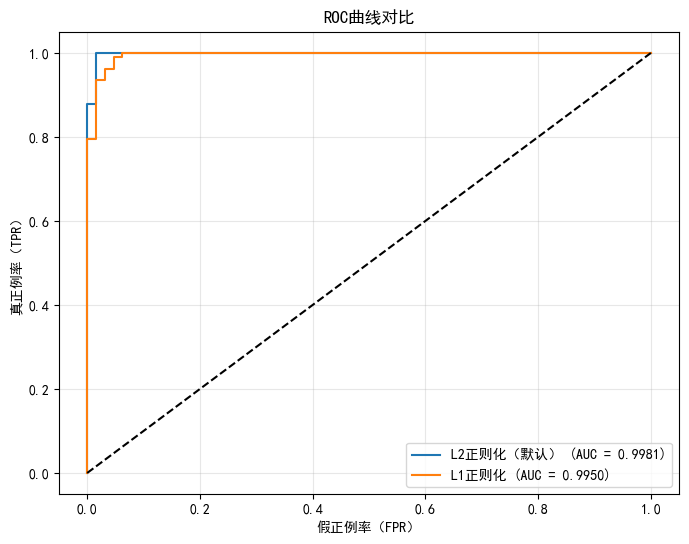

In [8]:
# 6. 绘制ROC曲线
plt.figure(figsize=(8, 6))
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]["概率"])
    # 使用 roc_curve 函数计算当前模型预测结果的假正例率（FPR）、真正例率（TPR）和阈值
    # y_test 为真实标签，results[name]["概率"] 为当前模型预测的类别1的概率

    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['AUC']:.4f})")
    # 绘制当前模型的 ROC 曲线
    # fpr 为假正例率，作为 x 轴数据；tpr 为真正例率，作为 y 轴数据
    # label 参数设置曲线的图例标签，显示模型名称和对应的 AUC 值（保留4位小数）

# 绘制随机猜测的基准线
plt.plot([0, 1], [0, 1], 'k--')  # 随机猜测的基准线
# [0, 1]（第一个参数）：表示 x 轴上的两个点，即 FPR 从 0 变化到 1。
# [0, 1]（第二个参数）：表示 y 轴上的两个点，即 TPR 从 0 变化到 1。
# 'k--' 是绘图格式字符串，'k' 表示颜色为黑色（black），'--' 表示使用虚线样式。

plt.xlabel("假正例率（FPR）")
plt.ylabel("真正例率（TPR）")
plt.title("ROC曲线对比")
plt.legend()  # 显示图例
plt.grid(alpha=0.3)  # 添加网格线，alpha 控制透明度
plt.show()

[-0.48431991 -0.46467509 -0.4503601  -0.55685253 -0.15972054  0.65734006
 -0.54263986 -0.6288608  -0.11581996  0.02977112 -0.88835779  0.36116556
 -0.2111288  -0.95481577 -0.18663722  0.57519908  0.16879018 -0.25735014
  0.31928871  0.34294713 -0.93863448 -1.21290675 -0.73206367 -0.97569074
 -0.7585647   0.02832094 -0.79133303 -0.99061511 -0.86116755 -0.1606306 ]


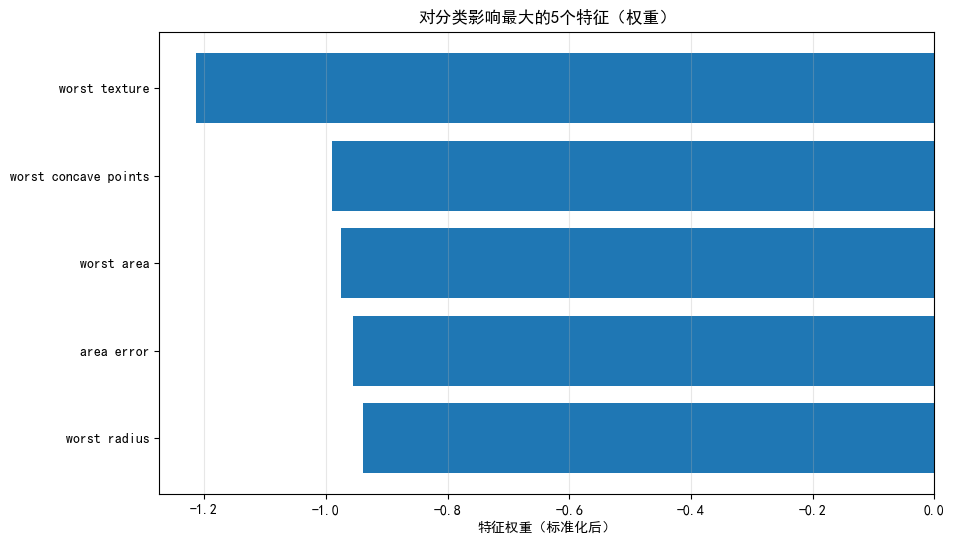

In [9]:
# 7. 特征重要性（权重绝对值）
# 获取最佳模型的权重系数，best_model.coef_ 是一个二维数组，[0] 表示取第一行
weights = best_model.coef_[0]
print(weights)

importance = np.abs(weights)

# 使用 np.argsort 对特征重要性进行排序，返回排序后的索引，[-5:] 表示取索引的最后5个，即重要性最大的5个特征的索引
top_idx = np.argsort(importance)[-5:]  # 取权重最大的5个特征

plt.figure(figsize=(10, 6))
# 绘制水平条形图展示对分类影响最大的5个特征的权重
# data.feature_names[top_idx]：获取最重要的5个特征的名称
# weights[top_idx]：获取这5个特征对应的权重值
plt.barh(data.feature_names[top_idx], weights[top_idx])

plt.xlabel("特征权重（标准化后）")
plt.title("对分类影响最大的5个特征（权重）")
# 添加水平网格线，设置网格线的透明度为0.3，仅显示x轴方向的网格线
plt.grid(alpha=0.3, axis='x')

plt.show()

### 总结  
逻辑回归是二分类任务的基础模型，核心是通过Sigmoid函数将线性输出转化为概率。其优点是**可解释性强、训练高效、输出概率有明确意义**，缺点是**只能捕捉线性关系**（需手动构造特征处理非线性）。实践中需注意特征标准化、类别不平衡处理和正则化调参，评估时根据业务目标选择合适指标（如AUC、F1等）。